In [0]:
from sklearn.datasets import make_moons

m=1000
X_moons,y_moons=make_moons(m,noise=0.1,random_state=42)

In [0]:
X_moons.shape

(1000, 2)

In [0]:
X_moons

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

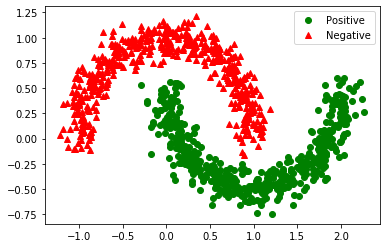

In [0]:
import matplotlib.pyplot as plt

plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

In [0]:
import numpy as np

X_moons_with_bias=np.c_[np.ones((m,1)),X_moons]

In [0]:
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [0]:

y_moons_column_vector=y_moons.reshape(-1,1)

In [0]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [0]:
def random_batch(X_train,y_train,batch_size):
  rnd_indices=np.random.randint(0,len(X_train),batch_size)
  X_batch=X_train[rnd_indices]
  y_batch=y_train[rnd_indices]
  return X_batch,y_batch

In [0]:
X_batch,y_batch=random_batch(X_train,y_train,5)
X_batch


array([[ 1.        , -0.78372601,  0.66224335],
       [ 1.        , -0.29183503,  1.00435872],
       [ 1.        ,  1.83518736,  0.03710472],
       [ 1.        ,  0.38886778, -0.31150772],
       [ 1.        ,  0.23948453,  1.10749872]])

In [0]:
y_batch

array([[0],
       [0],
       [1],
       [1],
       [0]])

In [0]:
n_inputs=2

In [0]:
import tensorflow as tf

X=tf.placeholder(tf.float32,shape=(None,n_inputs+1),name="X")
y=tf.placeholder(tf.float32,shape=(None,1),name="y")
theta=tf.Variable(tf.random_uniform([n_inputs+1,1],-1.0,1.0,seed=42),name="theta")
logits=tf.matmul(X,theta,name="logits")
y_probs=1/(1+tf.exp(-logits))

In [0]:
y_probs=tf.sigmoid(logits)




In [0]:
loss=tf.losses.log_loss(y,y_probs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
learning_rate=0.1
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)
init = tf.global_variables_initializer()


In [0]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_probs.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 0.67256576
Epoch: 100 	Loss: 0.27287525
Epoch: 200 	Loss: 0.2737775
Epoch: 300 	Loss: 0.27524284
Epoch: 400 	Loss: 0.27488515
Epoch: 500 	Loss: 0.27313358
Epoch: 600 	Loss: 0.27361763
Epoch: 700 	Loss: 0.2739679
Epoch: 800 	Loss: 0.2746811
Epoch: 900 	Loss: 0.27396595


In [0]:
y_proba_val[:5]


array([[0.60225797],
       [0.7025005 ],
       [0.5728079 ],
       [0.99577373],
       [0.51777345]], dtype=float32)

In [0]:
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

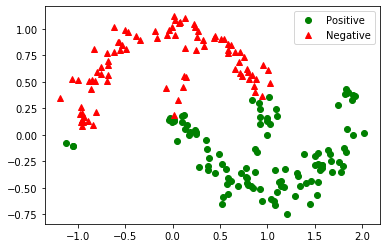

In [0]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

Pretty Bad because we used logistic model(which draws a decision boundary)!!